In [167]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [168]:
surrogate_configs = [
    "NoAdv_Surrogate_Data_V1",
    "NoAdv_Surrogate_Data_V2",
    "NoAdv_Surrogate_Data_V3",
    "NoAdv_Surrogate_Data_V4",
    "NoAdv_Surrogate_Data_V5",
]

targets = [
    "2024-05-10_01-41-38_lightslategray-operation",
    "2024-05-09_11-28-00_lemonchiffon-carry",
    "2024-05-09_14-13-30_orangered-collection",
    "2024-05-09_17-17-19_lightsalmon-manage",
    "2024-05-09_23-02-23_lightcoral-owner",
    "2024-05-09_20-00-28_mediumpurple-class",
]

In [ ]:
import shutil

# move targets in subfolde

for target in targets:
    shutil.move(
        f"/app/wafcraft/results/target_{target}",
        f"/app/wafcraft/results/dataoverlap_nonadv_experiments/target_{target}",
    )

In [169]:
def get_transferabilities(target):
    path = f"/app/wafcraft/results/dataoverlap_nonadv_experiments/target_{target}/transferability.csv"
    df = pd.read_csv(path)

    means = {}
    deviations = {}

    for config in surrogate_configs:
        # get all entries in df where config column is equal to config
        config_df = df[df["config"] == config]
        mean_samples_evaded_percentage = config_df["samples_evaded_percentage"].mean()
        stddevation_samples_evaded_percentage = config_df[
            "samples_evaded_percentage"
        ].std()
        means[config] = mean_samples_evaded_percentage
        deviations[config] = stddevation_samples_evaded_percentage

    return means, deviations

In [170]:
all_means = {}
all_deviations = {}
for target in targets:
    means, deviations = get_transferabilities(target)
    all_means[target] = means
    all_deviations[target] = deviations

print(all_means)
# calulate the mean and std deviation of the means
means = {}
deviations = {}
for config in surrogate_configs:
    config_means = []
    config_deviations = []
    for target in targets:
        config_means.append(all_means[target][config])
        config_deviations.append(all_deviations[target][config])
    means[config] = sum(config_means) / len(config_means)
    deviations[config] = sum(config_deviations) / len(config_deviations)


print(means)
print(deviations)

{'2024-04-28_07-18-23_lightcoral-pretty': {'Surrogate_Data_V11': 0.8212483113742336, 'Surrogate_Data_V12': 0.8697086374522294, 'Surrogate_Data_V13': 0.9065380464135216, 'Surrogate_Data_V14': 0.8905184555694006, 'Surrogate_Data_V5': 0.8970338958641808}, '2024-04-28_22-59-40_blueviolet-physical': {'Surrogate_Data_V11': 0.8066858312632772, 'Surrogate_Data_V12': 0.8583659170990217, 'Surrogate_Data_V13': 0.896837550314526, 'Surrogate_Data_V14': 0.896562677602141, 'Surrogate_Data_V5': 0.9019628531994404}, '2024-05-14_22-20-02_lightpink-medical': {'Surrogate_Data_V11': 0.835044429701764, 'Surrogate_Data_V12': 0.8774210853149267, 'Surrogate_Data_V13': 0.9279136873070675, 'Surrogate_Data_V14': 0.9147036690278753, 'Surrogate_Data_V5': 0.9244989464436422}, '2024-04-10_13-36-12_darkcyan-why': {'Surrogate_Data_V11': 0.8255343328039811, 'Surrogate_Data_V12': 0.8610477472143173, 'Surrogate_Data_V13': 0.9022722492169656, 'Surrogate_Data_V14': 0.9014038022712993, 'Surrogate_Data_V5': 0.900347368972148}

Means: [0.8304215622762247, 0.871837907041623, 0.9148331033099075, 0.90440418143977, 0.9167245153079281]
Std Devs: [0.04226108007621762, 0.026414908828308464, 0.02505574837982018, 0.030163321321517167, 0.034355432345731365]


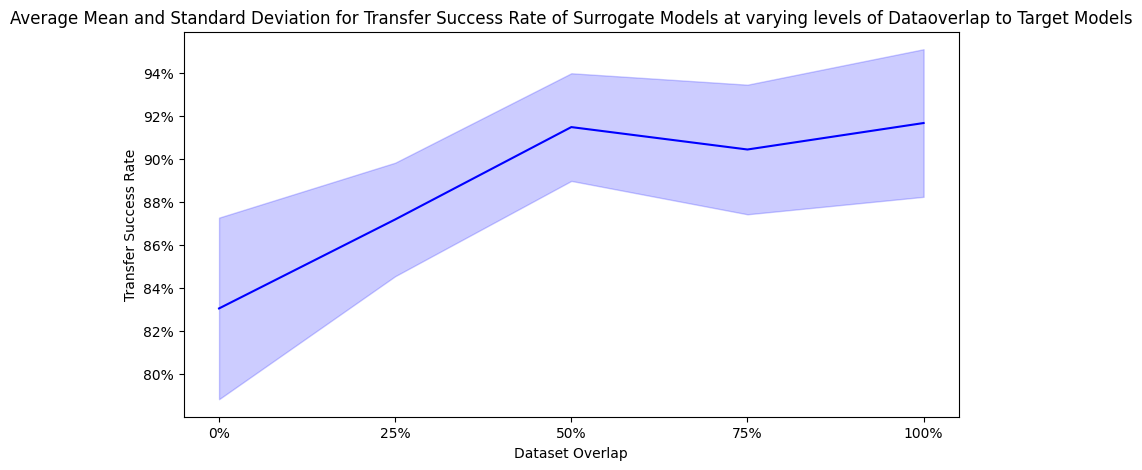

In [171]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter

groups = ["0%", "25%", "50%", "75%", "100%"]

means = list(means.values())
std_devs = list(deviations.values())

# new_means, new_devs = get_transferabilities(targets[1])
# means = list(new_means.values())
# std_devs = list(new_devs.values())

print(f"Means: {means}")
print(f"Std Devs: {std_devs}")

plt.figure(figsize=(10, 5))
plt.plot(groups, means, label="Mean", color="blue")


plt.fill_between(
    groups,
    np.array(means) - np.array(std_devs),
    np.array(means) + np.array(std_devs),
    color="blue",
    alpha=0.2,
)

title = "Average Mean and Standard Deviation for Transfer Success Rate of Surrogate Models at varying levels of Dataoverlap to Target Models"
xlabel = "Dataset Overlap"
ylabel = "Transfer Success Rate"

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
# plt.legend()

plt.gca().yaxis.set_major_formatter(PercentFormatter(1, decimals=0))
plt.show()